In [1]:
import numpy as np
import pandas as pd


In [609]:
data_true=pd.read_csv("imputed_data.csv")

In [623]:
data=data_true.iloc[:,3:8]

In [624]:
data=data[(data.City=="Dallas Ft Worth") & (data.Year!=2020.0)]

In [625]:
data.shape

(9131, 5)

In [626]:
X=data.iloc[:,4]
# y=data.iloc[:,4]


In [627]:
# import category_encoders as ce
# ce_binary = ce.BinaryEncoder(cols = ['City','Month','Day','Year'])
# X=ce_binary.fit_transform(X, y)

In [628]:
# frames=[X,y]
# X=pd.concat(frames,axis=1)

In [629]:
# X=X.iloc[:,1:]

In [630]:
X=np.array(X)

In [631]:
# avg_temp_y=X_feat[:,13]
avg_temp_y=np.reshape(X,(-1,1))

In [632]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

avg_temp_y = scaler.fit_transform(avg_temp_y)
avg_temp_y=avg_temp_y.ravel()
X_feat=avg_temp_y

In [633]:
np.shape(X_feat)

(9131,)

In [634]:
features_set = []
labels = []
for i in range(50,9131):
    features_set.append(X_feat[i-50:i])
    labels.append(X_feat[i])

In [635]:
features_set, labels = np.array(features_set), np.array(labels)

In [636]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [637]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [638]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [639]:
model.fit(features_set, labels, epochs = 15, batch_size = 32)

Epoch 1/15
9081/9081 [==============================] - 29s 3ms/step - loss: 0.0212
Epoch 2/15
9081/9081 [==============================] - 26s 3ms/step - loss: 0.0137: 0s - los
Epoch 3/15
9081/9081 [==============================] - 26s 3ms/step - loss: 0.0132
Epoch 4/15
9081/9081 [==============================] - 27s 3ms/step - loss: 0.0126
Epoch 5/15
9081/9081 [==============================] - 26s 3ms/step - loss: 0.0117
Epoch 6/15
9081/9081 [==============================] - 27s 3ms/step - loss: 0.0112: 1s
Epoch 7/15
9081/9081 [==============================] - 26s 3ms/step - loss: 0.0106
Epoch 8/15
9081/9081 [==============================] - 26s 3ms/step - loss: 0.0099
Epoch 9/15
9081/9081 [==============================] - 26s 3ms/step - loss: 0.0088
Epoch 10/15
9081/9081 [==============================] - 25s 3ms/step - loss: 0.0075
Epoch 11/15
9081/9081 [==============================] - 26s 3ms/step - loss: 0.0068
Epoch 12/15
9081/9081 [==============================] - 26s

In [640]:
data_20=data_true[(data_true['Year'] == 2020) & (data_true["City"]=="Dallas Ft Worth")]

In [641]:
data_2020=data_20.iloc[:,7]


In [642]:
# test_X=data_2020.iloc[:,0:4]
# test_y=data_2020.iloc[:,4]
# #ce_binary_test = ce.BinaryEncoder(cols = ['Region','Country','City','Month','Day','Year'])
# X_test=ce_binary.transform(test_X, test_y)


In [643]:
# frames=[X_test,test_y]
# X_test=pd.concat(frames,axis=1)

In [644]:
# total_feat=X_test.iloc[:,:].values
# avg_temp_y=total_feat[:,14]
data_2020=np.array(data_2020)
avg_temp_y=np.reshape(data_2020,(-1,1))
avg_temp_y = scaler.transform(avg_temp_y)
data_2020=avg_temp_y.ravel()


In [645]:
total = np.concatenate((X_feat,data_2020))

In [646]:
test_inputs = total[len(total) - len(X_test) - 50:]

In [647]:
test_features = []
for i in range(50, 184):
    test_features.append(test_inputs[i-50:i])

In [648]:
test_features = np.array(test_features)

test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [649]:
# test_set=np.reshape(test_features[0],(1,35,36))

In [650]:
predictions = model.predict(test_features)

In [651]:
y_test=data_20.iloc[:,7].values

In [652]:
predictions = scaler.inverse_transform(predictions)

In [653]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
print(r2_score(y_test,predictions))
print(math.sqrt(mean_squared_error(y_test,predictions)))

0.6685523878414683
6.508851408375742


In [654]:
import matplotlib.pyplot as plt

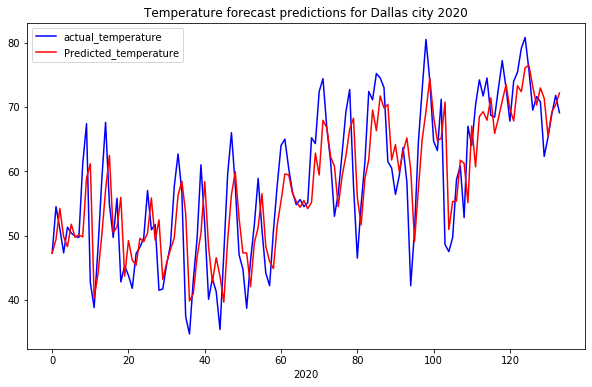

In [656]:
plt.figure(figsize=(10,6))
plt.plot(y_test, color='blue', label='actual_temperature')
plt.plot(predictions , color='red', label='Predicted_temperature')
plt.title('Temperature forecast predictions for Dallas city 2020')
plt.xlabel('2020')

plt.legend()
plt.show()